In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'officer_jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
221026,Jersey,British Virgin Islands
221027,China,British Virgin Islands
221028,China,British Virgin Islands
221029,United States,British Virgin Islands
221030,Indonesia,British Virgin Islands
...,...,...
221136,Indonesia,Samoa
221137,Cayman Islands,Samoa
221138,British Virgin Islands,Samoa
221139,China,Samoa


In [5]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,British Virgin Islands,Cook Islands,1
1,British Virgin Islands,Samoa,1
2,British Virgin Islands,Seychelles,1
3,Canada,British Virgin Islands,1
4,Cayman Islands,British Virgin Islands,1
5,Cayman Islands,Samoa,1
6,China,British Virgin Islands,15
7,China,Labuan,1
8,China,Samoa,2
9,China,Singapore,1


### Convert Data to an Undirected Edge List

In [6]:
#df_jur_grouped_list = df_jur_grouped.values.tolist()
#df_jur_grouped_list

In [7]:
#d = collections.defaultdict(int)
#for n1, n2, v in df_jur_grouped_list:
#    d[min(n1, n2), max(n1, n2)] += v
#result = [[k[0], k[1], v] for k, v in d.items()]

In [8]:
#df_net = pd.DataFrame(result)
#df_net

In [9]:
#df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
#df_net

In [10]:
#import df_net to csv later

In [11]:

g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


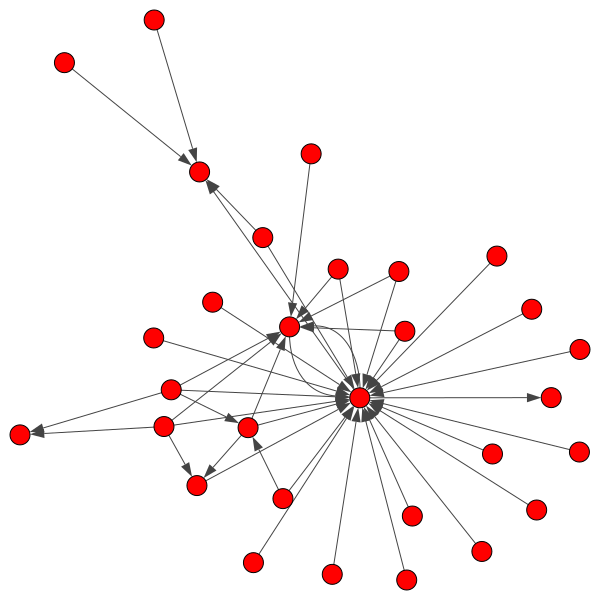

In [12]:
ig.plot(g)

In [13]:
g.diameter()

3

In [14]:
len(g.vs.indices)

30

In [15]:
#g.vs.indices
df_jur_grouped['node_start'].value_counts()

China                     4
Taiwan                    4
Singapore                 3
British Virgin Islands    3
United States             2
Cayman Islands            2
Indonesia                 2
US Virgin Islands         2
India                     2
Italy                     1
Romania                   1
Malaysia                  1
Samoa                     1
South Korea               1
Philippines               1
Czech Republic            1
United Arab Emirates      1
Hong Kong                 1
Canada                    1
Jersey                    1
Monaco                    1
United Kingdom            1
Macao                     1
New Zealand               1
Japan                     1
Thailand                  1
Fiji                      1
Name: node_start, dtype: int64

In [16]:
uni =df_jur_grouped['node_start'].unique()

In [17]:
len(uni)

27

In [18]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 0, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 1, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 2, {'name': 'Samoa'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 3, {'name': 'Seychelles'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 4, {'name': 'Canada'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 5, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 6, {'name': 'China'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 7, {'name': 'Labuan'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 8, {'name': 'Singapore'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 9, {'name': 'Czech Republic'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 10, {'name': 'Fiji'}),
 igraph.Vertex(<igraph.Graph object at 0x7f827dce6040>, 11, {'name': 'Hong Kon

In [19]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
         #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [20]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,2.241379,0.01,3.0,-0.517222,1.413793,0.048751,1.625000
1,2,2.142857,0.01,3.0,-0.494715,1.357143,0.048469,1.625000
2,3,1.370370,0.02,3.0,-0.429875,1.370370,0.050754,1.506849
3,4,1.423077,0.02,3.0,-0.469792,1.384615,0.053254,1.513889
4,5,1.480000,0.03,3.0,-0.525230,1.400000,0.056000,1.521127


In [22]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
25,26,0.0,0.13,0.0,NaN,0.0,0.0,NaN
26,27,0.0,0.14,0.0,NaN,0.0,0.0,NaN
27,28,0.0,0.14,0.0,NaN,0.0,0.0,NaN
28,29,0.0,0.15,0.0,NaN,0.0,0.0,NaN
29,30,0.0,0.15,NaN,NaN,0.0,NaN,NaN


In [23]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,13.0,2.827586,-0.517222,3.896552,0.048751,1.625000
1,2,0.01,13.0,2.821429,-0.506882,4.000000,0.051020,1.620000
2,3,0.02,13.0,2.814815,-0.495517,4.111111,0.053498,1.614583
3,4,0.02,13.0,2.923077,-0.533297,4.230769,0.056213,1.621053
4,5,0.03,13.0,2.840000,-0.565630,4.360000,0.059200,1.593407


In [24]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
15,16,0.08,22.0,0.0,-0.639602,4.642857,0.066327,1.0
16,17,0.09,15.0,0.0,-0.670820,3.230769,0.065089,1.0
17,18,0.09,15.0,0.0,-0.666667,3.416667,0.069444,1.0
18,19,0.10,15.0,0.0,-0.661438,3.545455,0.074380,1.0
19,20,0.10,15.0,0.0,NaN,3.800000,0.080000,1.0
20,21,0.11,15.0,0.0,NaN,4.111111,0.086420,1.0
21,22,0.11,0.0,0.0,NaN,0.000000,0.000000,NaN
22,23,0.12,0.0,0.0,NaN,0.000000,0.000000,NaN
23,24,0.12,0.0,0.0,NaN,0.000000,0.000000,NaN
24,25,0.13,0.0,0.0,NaN,0.000000,0.000000,NaN


### Targeted attack

In [25]:
##try sort by transitivity 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'transitivity':g.transitivity_local_undirected(mode='zero',weights='weight')})

In [26]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='transitivity',ascending=False)

In [27]:
temp_df.head(50)

,Node_indice,Nodes,transitivity
5,5,Cayman Islands,2.000000
13,13,Indonesia,2.000000
12,12,India,2.000000
29,29,United States,1.000000
26,26,US Virgin Islands,1.000000
6,6,China,0.929825
11,11,Hong Kong,0.928571
24,24,Taiwan,0.920000
8,8,Singapore,0.785714
2,2,Samoa,0.362500


In [28]:
temp_df.tail(50)

,Node_indice,Nodes,transitivity
5,5,Cayman Islands,2.000000
13,13,Indonesia,2.000000
12,12,India,2.000000
29,29,United States,1.000000
26,26,US Virgin Islands,1.000000
6,6,China,0.929825
11,11,Hong Kong,0.928571
24,24,Taiwan,0.920000
8,8,Singapore,0.785714
2,2,Samoa,0.362500


In [29]:
#extract out by Node
transitivity_of_del = temp_df['Nodes'].tolist()

In [30]:
#print the list to check it
transitivity_of_del

['Cayman Islands',
 'Indonesia',
 'India',
 'United States',
 'US Virgin Islands',
 'China',
 'Hong Kong',
 'Taiwan',
 'Singapore',
 'Samoa',
 'Cook Islands',
 'British Virgin Islands',
 'Fiji',
 'Czech Republic',
 'United Kingdom',
 'United Arab Emirates',
 'Seychelles',
 'Thailand',
 'Canada',
 'South Korea',
 'Romania',
 'Philippines',
 'New Zealand',
 'Monaco',
 'Malaysia',
 'Macao',
 'Jersey',
 'Labuan',
 'Italy',
 'Japan']

In [31]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [32]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,Cayman Islands,2.275862,3.0,-0.537620,1.379310,0.047562,1.634615
1,2,0.01,Indonesia,2.285714,3.0,-0.550515,1.357143,0.048469,1.640000
2,3,0.02,India,2.296296,3.0,-0.565979,1.333333,0.049383,1.645833
3,4,0.02,United States,2.307692,3.0,-0.571476,1.307692,0.050296,1.652174
4,5,0.03,US Virgin Islands,2.240000,3.0,-0.596635,1.280000,0.051200,1.651163


In [34]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
25,26,0.13,Macao,0.0,0.0,NaN,0.0,0.0,NaN
26,27,0.14,Jersey,0.0,0.0,NaN,0.0,0.0,NaN
27,28,0.14,Labuan,0.0,0.0,NaN,0.0,0.0,NaN
28,29,0.15,Italy,0.0,0.0,NaN,0.0,0.0,NaN
29,30,0.15,Japan,0.0,NaN,NaN,0.0,NaN,NaN


In [35]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Cayman Islands,2.862069,13.0,-0.537620,3.896552,0.047562,1.634615
1,2,0.01,Indonesia,2.785714,13.0,-0.550515,3.678571,0.048469,1.640000
2,3,0.02,India,2.703704,13.0,-0.565979,3.629630,0.049383,1.645833
3,4,0.02,United States,2.730769,13.0,-0.571476,3.423077,0.050296,1.652174
4,5,0.03,US Virgin Islands,2.680000,13.0,-0.596635,3.480000,0.051200,1.651163
5,6,0.03,China,2.458333,13.0,-0.606514,2.833333,0.048611,1.670886
6,7,0.04,Hong Kong,2.434783,4.0,-0.601610,2.347826,0.047259,1.684932
7,8,0.04,Taiwan,2.318182,4.0,-0.633131,1.363636,0.045455,1.705882
8,9,0.05,Singapore,2.190476,4.0,-0.665942,1.238095,0.045351,1.718750
9,10,0.05,Samoa,1.300000,4.0,-0.696183,1.150000,0.042500,1.604651


In [36]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Cayman Islands,2.862069,13.0,-0.537620,3.896552,0.047562,1.634615
1,2,0.01,Indonesia,2.785714,13.0,-0.550515,3.678571,0.048469,1.640000
2,3,0.02,India,2.703704,13.0,-0.565979,3.629630,0.049383,1.645833
3,4,0.02,United States,2.730769,13.0,-0.571476,3.423077,0.050296,1.652174
4,5,0.03,US Virgin Islands,2.680000,13.0,-0.596635,3.480000,0.051200,1.651163
5,6,0.03,China,2.458333,13.0,-0.606514,2.833333,0.048611,1.670886
6,7,0.04,Hong Kong,2.434783,4.0,-0.601610,2.347826,0.047259,1.684932
7,8,0.04,Taiwan,2.318182,4.0,-0.633131,1.363636,0.045455,1.705882
8,9,0.05,Singapore,2.190476,4.0,-0.665942,1.238095,0.045351,1.718750
9,10,0.05,Samoa,1.300000,4.0,-0.696183,1.150000,0.042500,1.604651


#### Unweighted

In [37]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted
#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 100)
#ax[0].set_ylim([0,12])
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

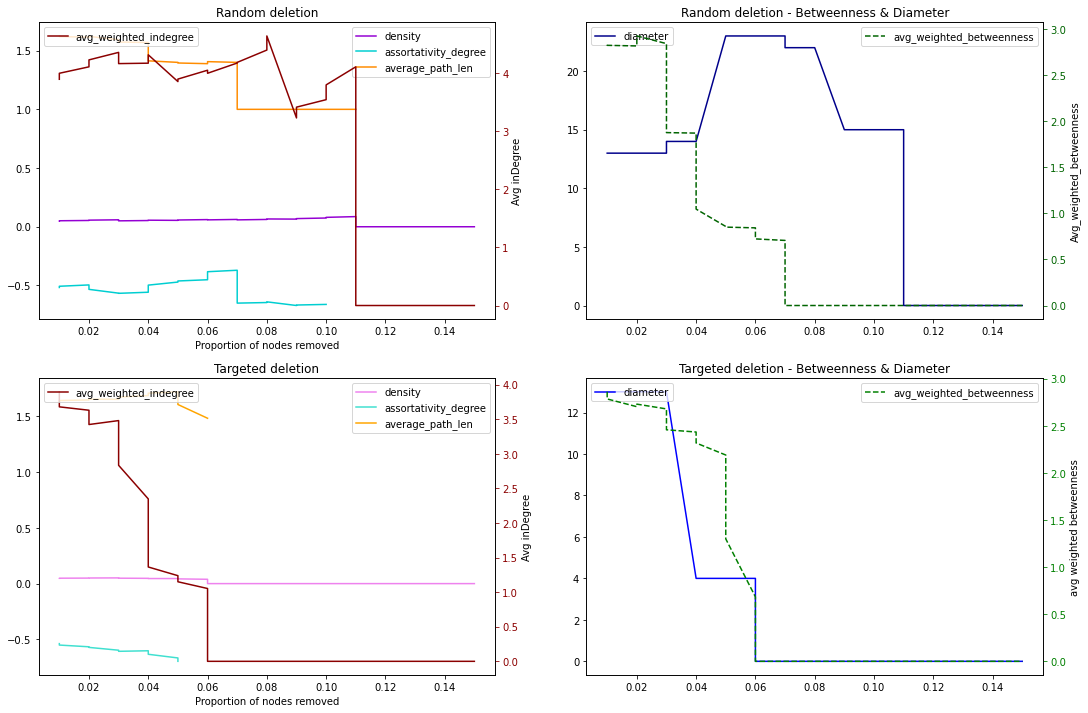

In [38]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax[0,0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[1,0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()